# Pogreške u numeričkom računanju

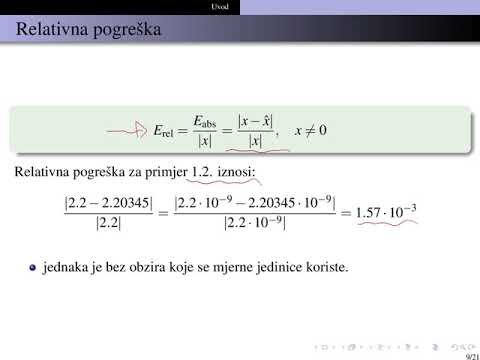

In [54]:
from IPython.lib.display import YouTubeVideo
vid = YouTubeVideo("op-C-ArVP5o")
display(vid)

# Prikaz realnih brojeva u računalu

In [55]:
from IPython.lib.display import YouTubeVideo
vid = YouTubeVideo("2CdZyd96FP0 ")
display(vid)



In [73]:
import sys
sys.float_info.max

1.7976931348623157e+308

In [74]:
a = float('inf')

print('Addition : ',a + 10)
print('Subtraction : ',a - 10)
print('Multiplication : ',a * 10)
print('Division : ',a / 10)

print('\nMultiplication by Zero: ',a * 0)

#with np.errstate(divide = 'ignore'):
#    b=1.0/0.0    
#print(b)

a=0.2e2000
print("a=",a)

#b=2.0**(2000)
#print(b)
1/0.0

Addition :  inf
Subtraction :  inf
Multiplication :  inf
Division :  inf

Multiplication by Zero:  nan
a= inf


ZeroDivisionError: float division by zero

MATLAB je nastao kao sučelje za bazične biblioteke za linearnu algebru (BLAS). Ponašanje jednako MATLABu može se konfigurirati promjenom postavke errstate u biblioteci numpy.

In [75]:
from collections import OrderedDict
olderr = np.seterr(all='ignore')  # Set error handling to known state.
np.arange(3) / 0.

array([nan, inf, inf])

Pogledajmo jedan zanimljiv primjer.
Podsjetimo se da je Taylorov red za funkciju $\cos x$
$$\cos x=\sum_{n=0}^\infty (-1)^n\frac{x^{2n}}{(2n)!}$$

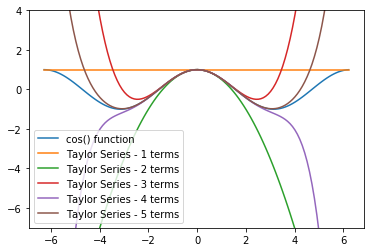

In [57]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


def func_cos(x, n):
    cos_approx = 0
    for i in range(n):
        coef = (-1)**i
        num = x**(2*i)
        denom = math.factorial(2*i)
        cos_approx += ( coef ) * ( (num)/(denom) )
    
    return cos_approx

angles = np.arange(-2*np.pi,2*np.pi,0.1)
p_cos = np.cos(angles)

fig, ax = plt.subplots()
ax.plot(angles,p_cos)

for i in range(1,6):
    t_cos = [func_cos(angle,i) for angle in angles]
    ax.plot(angles,t_cos)

ax.set_ylim([-7,4])

# set up legend
legend_lst = ['cos() function']
for i in range(1,6):
    legend_lst.append(f'Taylor Series - {i} terms')
ax.legend(legend_lst, loc=3)

plt.show()

# Pogreška nastala zbog prikaza brojeva u računalu

In [78]:
a=4./3
b=a-1.0
c=3*b
e=1-c
print(e)

2.220446049250313e-16


# Zadatak

**Odredite vrijednost najvećeg pozitivnog IEEE  fp-broja dvostruke preciznosti!**

Rješenje. 

Prisjetimo se da je 
$$x=\pm (1+f)\times 2^e$$ gdje je

$$-1022\leq e\leq 1023,\quad f=sum_{i=1}^{52}\beta_i\cdot 2^{-i},\ \beta_i\in\{0,1\}$$

Prvi fp broj koji je manji od +INF je (eksponent 11 bitva, mantisa 52 bita)

$$0 \quad 11111111110 \quad 1111111111111111111111111111\ldots 1$$

Eksponent je $e=1023$ (prvi manji od onog za INF). 
Mantisa je 
$$1+f_{max}\ f_{max}=1\cdot 2^{-1}+1\cdot 2^{-2}+1\cdot 2^{-3}+\ldots 1\cdot 2^{-52}$$
$$f_{max}=\frac{1}{2}\left(1+\frac{1}{2}+\ldots +\frac{1}{2^{51}}\right)=\frac{1}{2}\frac{1-\left(\frac{1}{2}\right)^{52}}{1-\frac{1}{2}}=1-2^{-52}$$
Dakle, najveći fp-broj u dvostrukoj preciznosti je

$$(1+f_{max})\times 2^{1023}=(1+1-2^{-52})\times 2^{1023}=2^{1024}-2^{971}\approx 1.797693\cdot 10^{308}$$

# Zadatak

**Nađite vrijednost prvog fp-broja dvostruke preciznosti koji je veći od 50**

**Rješenje.**

Najveća potencija broja 2 za koju je $2^k<50$je $k=5.$

$$50=(1+f)\times 2^5, f\in [0,1\rangle$$


$$\begin{array}{ccc} 50:2&=25\quad & 0\\
25:2&=12\quad & 1\\
12:2&=6\quad & 0\\
6:2&=3\quad & 0\\
3:2&=1\quad & 1\\
1:2&=0\quad & 1\end{array}$$
Dakle prikaz broja $50$ je
$$(110010)_2=(1.1001)_2\times 2^{5}$$

Mantisa ima 52 mjesta i oblika je
$$100100\ldots 00$$

Prvi veći fp-broj od $50$ ima mantisu
$$100100\ldots 01$$

Dakle traženi broj je:
$$(1+f+2^{-52})\times 2^{5}=(1+f)\times 2^{5}+2^{-52+5}=50+2^{-47}$$

# Zadatak

**Koliko ima fp-brojeva svostruke preciznosti**

**Rješenje.**

Imamo 
predznak+eksponent+mantisa=1+11+52=64 bita


$2^{64}$ moguća rasporeda nula i jedinica od čega oduzimamo:

1. sve nule u eksponentu, $\pm$: $2^{52}\cdot 2$
2. sve jedinice u eksponentu $\pm$: $2^{52}\cdot 2$

Rezultat je 
$$2^{64}-2\cdot 2^{53}=2^{64}-2^{54}$$